# Experimental Results on the Toy exemple

## Imports of the libraries and our functions

In [2]:
#imports
import numpy as np
import numpy.linalg as npl
import numpy.random as npr

import scipy as sp
import scipy.linalg as spl
import scipy.stats as sps
import time
import pandas as pd

import matplotlib.pyplot as plt

In [35]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from toy_example import * #allows us to use our functions directly

## Set up parameters

In [4]:
#Lambda = 10
T = 30
#param_accept = 0.3
a = 1
b = 0

## Checking the behavior of $Y$ (mean of L2-norm part in distribution used for RW), $x_{true}$ (reproduction rate) and $x_{tilde,true}$ (second-derivative of reproduction rate) simulated with $\mathcal{E}(\lambda)$ law

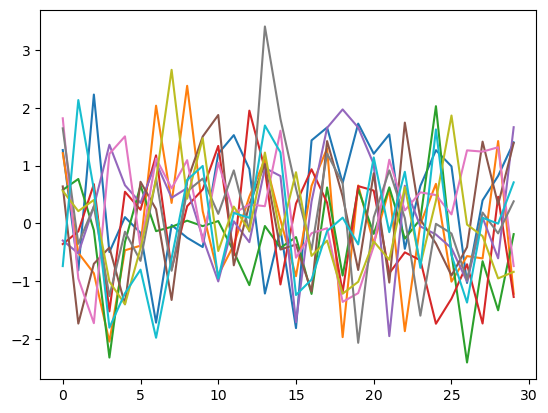

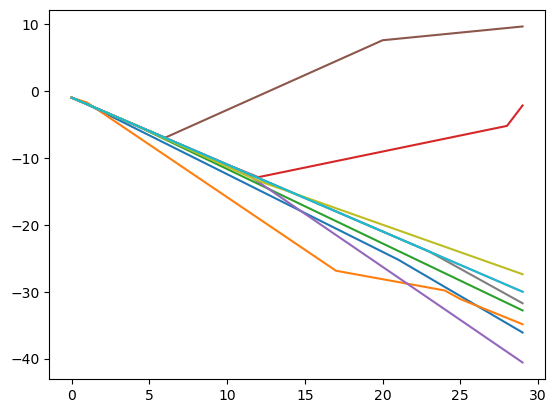

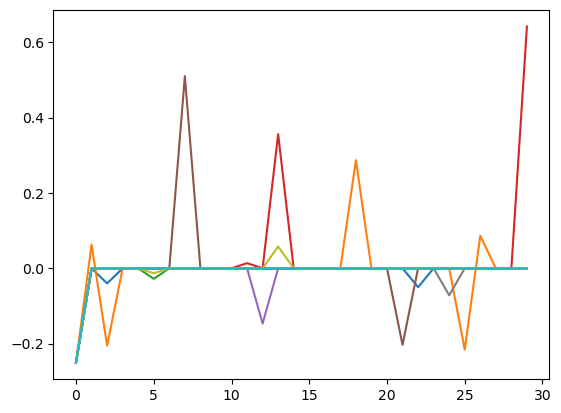

In [5]:
Lambda = 5
taille_echant = 10
Y = np.zeros((taille_echant, T))
x_true = np.zeros((taille_echant, T))
x_tilde_true = np.zeros((taille_echant, T))
for i in range(taille_echant):
    Y[i,:], x_true[i,:], x_tilde_true[i,:] = Computation_Y_simu_debug(T, Lambda,a,b)
    fig = plt.figure(1)
    plt.plot(Y[i,:])
    fig = plt.figure(2)
    plt.plot(x_true[i,:])
    fig = plt.figure(3)
    plt.plot(x_tilde_true[i,:])

plt.show()

> We wanted our $x_{true}$ to have the shape of a hat to be the same kind of the real epidemiological data of Covid19 but with our simulations, we can see that it is almost never the case and that the value for some component of some simulations is exploding with the value  of $T$. So we forget this way of simulating $Y$ and we will just fix the value of  $x_{true}$ to get this hat shape and then transform it to get $Y$.

## Checking the behavior of $Y$ (mean of L2-norm part in distribution used for RW), $x_{true}$ (reproduction rate) and $x_{tilde,true}$ (second-derivative of reproduction rate) with deterministic $x_{true}$

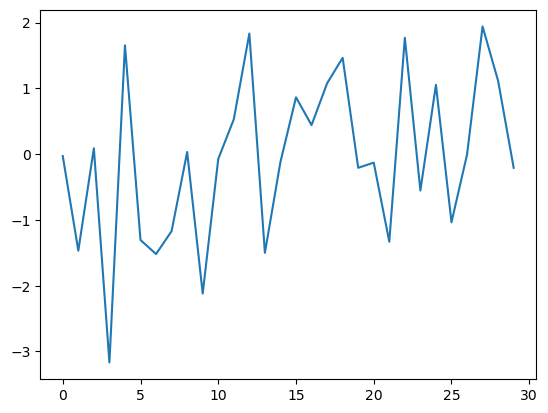

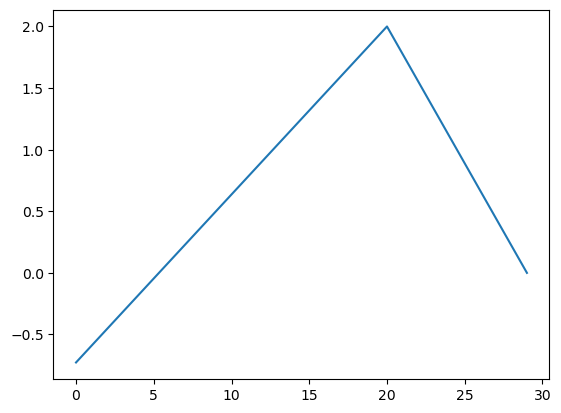

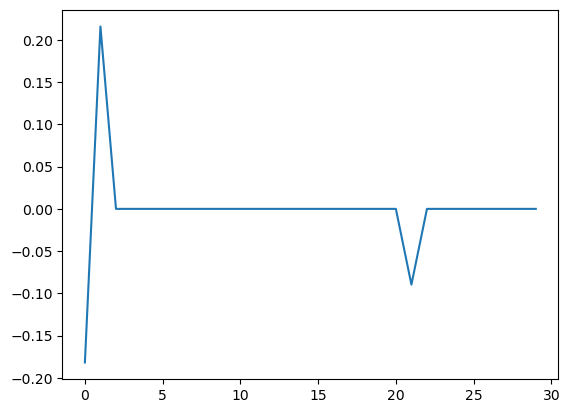

In [6]:
taille_echant = 1
Y = np.zeros((taille_echant, T))
x_true = np.zeros((taille_echant, T))
x_tilde_true = np.zeros((taille_echant, T))
for i in range(taille_echant):
    Y[i,:], x_true[i,:], x_tilde_true[i,:],_ = Computation_Y_circ_det_debug(T, 0.99)
    fig = plt.figure(1)
    plt.plot(Y[i,:])
    fig = plt.figure(2)
    plt.plot(x_true[i,:])
    fig = plt.figure(3)
    plt.plot(x_tilde_true[i,:])

plt.show()

## Choice of lambda

> We set lambda such that the value of the prior at x_true is equal to 0.99 (almost equal to the value of the prior at the argmax, which is 1). We remind that the prior is the L1 norm part of the distribution.

In [7]:
#Y = Computation_Y_exp(T, Lambda, a, b)
Y, Lambda, a, b = Computation_Y_circ_det(T, 0.99)
print(Lambda)

0.011040036055441254


## Theoretical results on the toy example (mean, argmax and quantiles)

In [8]:
### we call the different functions
D = BuildD(T)
U, Delta, Vt = BuildUVDelta(D)
A = BuildA(Delta, Vt)
sh = Buildsh(T, a, b)
#Y ,Lambda= Computation_Y_circ_det(T)
x,x_tilde = ComputeArgmax(T,Lambda, Y,a,b)
mu,mu_tilde = ComputeMeans(T,Lambda, Y,a,b)
q1 = ComputeQuantiles(T,Lambda,0.975*np.ones(T), Y,a,b)
q2 = ComputeQuantiles(T,Lambda,0.025*np.ones(T), Y,a,b)
med = ComputeQuantiles(T,Lambda,0.5*np.ones(T), Y,a,b)
t2=time.time()

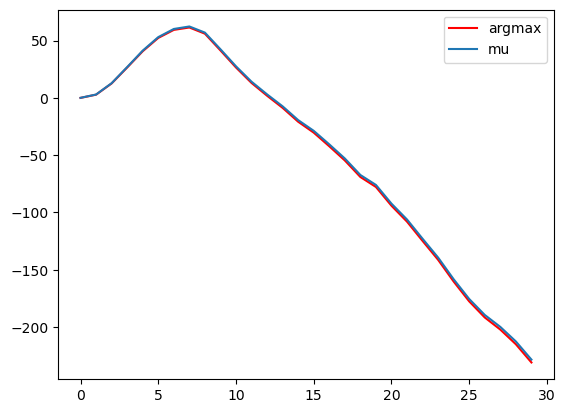

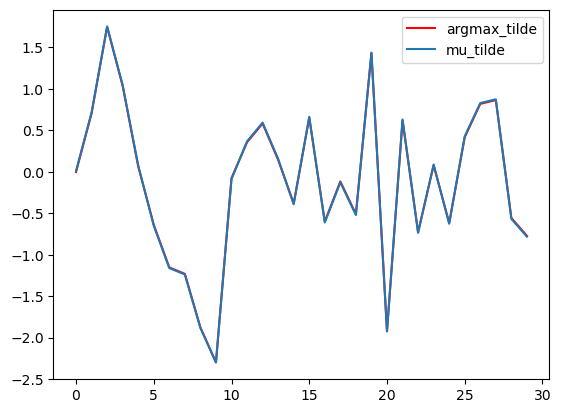

[-0.00306537  0.70351197  1.74704872  1.03473993  0.0651246  -0.63938023
 -1.15326842 -1.23112078 -1.8779473  -2.29740869 -0.07654257  0.35595178
  0.58155487  0.14339157 -0.38181335  0.6517722  -0.6010214  -0.11698183
 -0.5105824   1.43041919 -1.92174587  0.62002543 -0.726483    0.07691297
 -0.61647879  0.41670524  0.81876782  0.86350969 -0.55778631 -0.77261948]


In [9]:
plt.figure()
plt.plot(x, color = "red", label= "argmax")
plt.plot(mu, label = "mu")
plt.legend()
plt.figure()
plt.plot(x_tilde, color = "red", label= "argmax_tilde")
plt.plot(mu_tilde, label = "mu_tilde")
plt.legend()
plt.show()
print(x_tilde)

## Simulation with the different methods

End of the burn-in
End of the burn-in
End of the burn-in
End of the burn-in
183.81768012046814


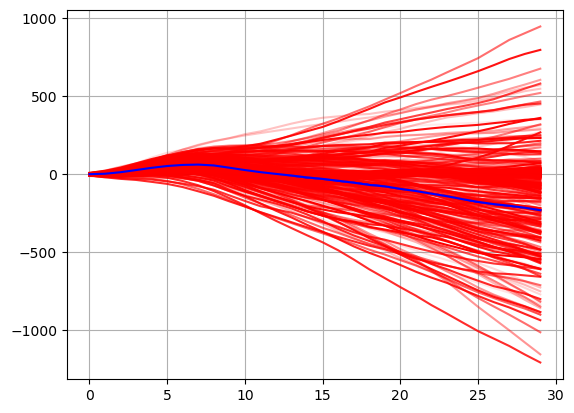

In [10]:
t1=time.time()
sim_theta1,sim_theta_tilde1,sim_accepts1,sim_gammas1, Mean1,end_source = MetropolisHastings(T,Lambda, Y, a,b,1e5, "source")
sim_theta2,sim_theta_tilde2,sim_accepts2,sim_gammas2, Mean2,end_image = MetropolisHastings(T,Lambda, Y, a,b,1e5, "image")
sim_theta3,sim_theta_tilde3,sim_accepts3,sim_gammas3, Mean3,end_subdiff_source = MetropolisHastings(T,Lambda, Y,a,b, 1e5, "subdiff_source")
sim_theta4,sim_theta_tilde4,sim_accepts4,sim_gammas4, Mean4,end_subdiff_image = MetropolisHastings(T,Lambda, Y, a,b,1e5, "subdiff_image")
t2=time.time()
print(t2-t1)

In [11]:
theta_tab_prox_image,theta_tab_prox_image_tilde,_,_,Mean5,end_prox_image = MH_Prox_Image(T, Lambda, Y, a, b)

taux d'accept 0.927
gamma 0.001
taux d'accept 0.905
gamma 0.0016870000000000001
taux d'accept 0.899
gamma 0.0028088550000000003
taux d'accept 0.869
gamma 0.004659890445
taux d'accept 0.775
gamma 0.007590961534905001
taux d'accept 0.781
gamma 0.011652125956079177
taux d'accept 0.732
gamma 0.01795592609831801
taux d'accept 0.652
gamma 0.02679024173869047
taux d'accept 0.636
gamma 0.037827821335030945
taux d'accept 0.528
gamma 0.0528076385837032
taux d'accept 0.445
gamma 0.06801623849580972
taux d'accept 0.452
gamma 0.08195956738745071
taux d'accept 0.401
gamma 0.09933499567359026
taux d'accept 0.328
gamma 0.1153279299770383
taux d'accept 0.356
gamma 0.12547678781501767
taux d'accept 0.356
gamma 0.1400320952015597
taux d'accept 0.304
gamma 0.15627581824494063
taux d'accept 0.281
gamma 0.16627747061261683
taux d'accept 0.286
gamma 0.17309484690773413
taux d'accept 0.238
gamma 0.1810572098654899
taux d'accept 0.27
gamma 0.18069509544575893
taux d'accept 0.251
gamma 0.1861159483091317
taux d

In [12]:
q = np.array([2.5,50,97.5])
quantiles_emp1 = Quantiles(sim_theta_tilde1, q,T)
quantiles_emp2 = Quantiles(sim_theta_tilde2, q,T)
quantiles_emp3 = Quantiles(sim_theta_tilde3, q,T)
quantiles_emp4 = Quantiles(sim_theta_tilde4, q,T)
quantiles_emp5 = Quantiles(theta_tab_prox_image_tilde, q,T)

## Visualisation of theory VS simulation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


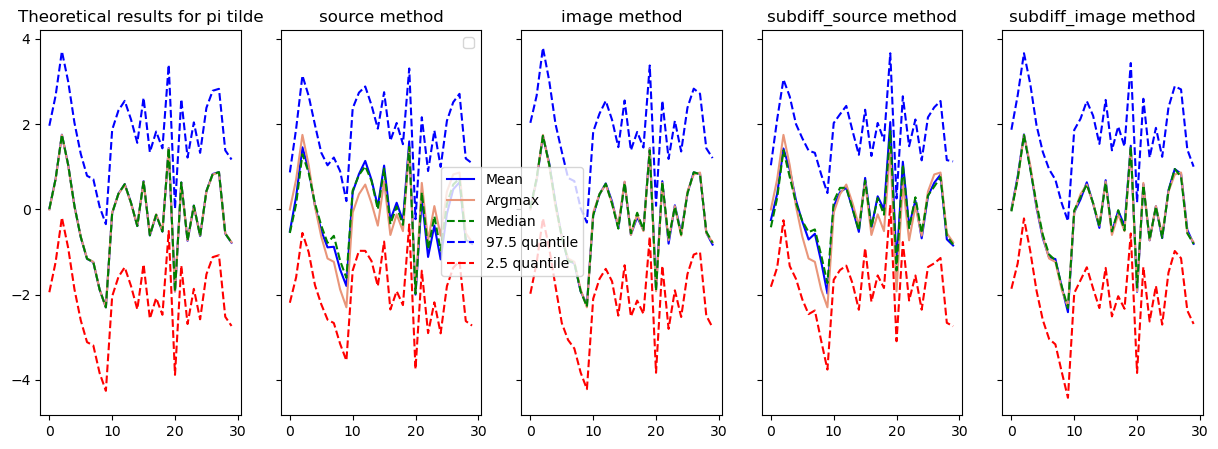

Qualité d'estimations des quantiles : 
Source :  0.7572493362931297
Image :  0.08813641676735179
Source Subdiff :  0.72285404021834
Image Subdiff :  0.1305268333085538
Prox Image :  0.975399669100944
--------------------------
Qualité d'estimations de la moyenne : 
Source :  0.4363973989725174
Image :  0.04633155175704212
Source Subdiff :  0.35436300353324807
Image Subdiff :  0.06582690494090443
Prox Image :  0.9349954104314822


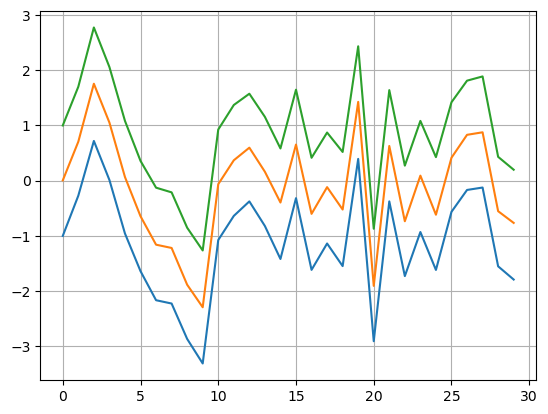

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), sharey=True)
#Plot of theoretical results
axes[0].plot(mu_tilde,color="blue",label="Mean")
axes[0].plot(x_tilde,color="darksalmon",label="Argmax")
axes[0].plot(med,'g--',label="Median")
axes[0].plot(q1,'b--',label="97.5 quantile")
axes[0].plot(q2,'r--',label="2.5 quantile")
axes[0].set_title("Theoretical results for pi tilde")


#Plot of empirical results with method source
axes[1].plot(D@Mean1,color="blue")
axes[1].plot(x_tilde,color="darksalmon")
axes[1].plot(quantiles_emp1[1],'g--')
axes[1].plot(quantiles_emp1[2],'b--')
axes[1].plot(quantiles_emp1[0],'r--')
axes[1].set_title("source method")
axes[1].legend()


#Plot of empirical results with method image
axes[2].plot(D@Mean2,color="blue")
axes[2].plot(x_tilde,color="darksalmon")
axes[2].plot(quantiles_emp2[1],'g--')
axes[2].plot(quantiles_emp2[2],'b--')
axes[2].plot(quantiles_emp2[0],'r--')
axes[2].set_title("image method")

#Plot of empirical results with method subdiff_source
axes[3].plot(D@Mean3,color="blue")
axes[3].plot(x_tilde,color="darksalmon")
axes[3].plot(quantiles_emp3[1],'g--')
axes[3].plot(quantiles_emp3[2],'b--')
axes[3].plot(quantiles_emp3[0],'r--')
axes[3].set_title("subdiff_source method")

#Plot of empirical results with method subdiff_image
axes[4].plot(D@Mean4,color="blue")
axes[4].plot(x_tilde,color="darksalmon")
axes[4].plot(quantiles_emp4[1],'g--')
axes[4].plot(quantiles_emp4[2],'b--')
axes[4].plot(quantiles_emp4[0],'r--')
axes[4].set_title("subdiff_image method")
# Shrink current axis by 20%
box0,box1 = axes[0].get_position(),axes[1].get_position()
#axes[0].set_position([box0.x0, box0.y0, box0.width * 0.8, box0.height])
#axes[1].set_position([box1.x0*0.8, box1.y0, box1.width * 0.8, box1.height])
fig.legend(loc=(0.8*box1.x0+box1.width,box1.height/2))
plt.show()

quantile_quality_source = np.sum(abs(quantiles_emp1[0] - q2))/(np.sum(abs(q2))) + np.sum(abs(quantiles_emp1[1] - med))/np.sum(abs(med)) + np.sum(abs(quantiles_emp1[2] - q1))/np.sum(abs(q1))
quantile_quality_image = np.sum(abs(quantiles_emp2[0] - q2))/np.sum(abs(q2)) + np.sum(abs(quantiles_emp2[1] - med))/np.sum(abs(med)) + np.sum(abs(quantiles_emp2[2] - q1))/np.sum(abs(q1))
quantile_quality_subdiff_source = np.sum(abs(quantiles_emp3[0] - q2))/np.sum(abs(q2)) + np.sum(abs(quantiles_emp3[1] - med))/np.sum(abs(med)) + np.sum(abs(quantiles_emp3[2] - q1))/np.sum(abs(q1))
quantile_quality_subdiff_image = np.sum(abs(quantiles_emp4[0] - q2))/np.sum(abs(q2)) + np.sum(abs(quantiles_emp4[1] - med))/np.sum(abs(med)) + np.sum(abs(quantiles_emp4[2] - q1))/np.sum(abs(q1))
quantile_quality_prox_image = np.sum(abs(quantiles_emp5[0] - q2))/np.sum(abs(q2)) + np.sum(abs(quantiles_emp5[1] - med))/np.sum(abs(med)) + np.sum(abs(quantiles_emp5[2] - q1))/np.sum(abs(q1))
mean_quality_source=np.sum(abs(D@Mean1-mu_tilde))/np.sum(abs(mu_tilde))
mean_quality_image=np.sum(abs(D@Mean2-mu_tilde))/np.sum(abs(mu_tilde))
mean_quality_subdiff_source=np.sum(abs(D@Mean3-mu_tilde))/np.sum(abs(mu_tilde))
mean_quality_subdiff_image=np.sum(abs(D@Mean4-mu_tilde))/np.sum(abs(mu_tilde))
mean_quality_prox_image=np.sum(abs(D@Mean5-mu_tilde))/np.sum(abs(mu_tilde))

print("Qualité d'estimations des quantiles : ")

print("Source : ", quantile_quality_source)
print("Image : ", quantile_quality_image)
print("Source Subdiff : ", quantile_quality_subdiff_source)
print("Image Subdiff : ", quantile_quality_subdiff_image)
print("Prox Image : ", quantile_quality_prox_image)
print("--------------------------")
print("Qualité d'estimations de la moyenne : ")

print("Source : ", mean_quality_source)
print("Image : ", mean_quality_image)
print("Source Subdiff : ", mean_quality_subdiff_source)
print("Image Subdiff : ", mean_quality_subdiff_image)
print("Prox Image : ", mean_quality_prox_image)
plt.figure()
plt.plot(quantiles_emp5[0])
plt.plot(quantiles_emp5[1])
plt.plot(quantiles_emp5[2])
plt.grid()

## Convergence of the empirical mean (five first dimensions, without burn-in)

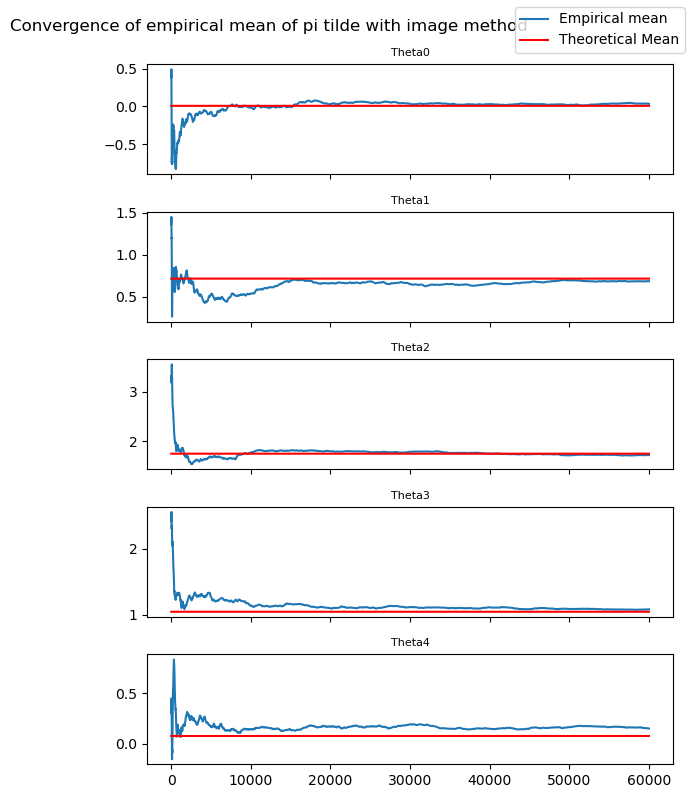

In [16]:
#Convergence plot of the mean of theta_tilde
nb_save=sim_theta2.shape[0] - end_image
x=np.linspace(1,nb_save,nb_save)
mean_tab=np.cumsum(sim_theta_tilde2[end_image:],axis=0)

fig,Axes = plt.subplots(5,1,figsize=(6,8),sharex=True)
for i in range(5):
    ax = Axes[i]
    res=mean_tab[:,i]/x
    ax.plot(x,res,label="Empirical mean" if i==0 else "")
    ax.plot(x,mu_tilde[i]*np.ones(nb_save),'r',label="Theoretical Mean" if i==0 else "")
    #ax.axvline(end_image,color="green")
    ax.set_title(f"Theta{i}",fontsize=8)

fig.suptitle("Convergence of empirical mean of pi tilde with image method", x=0.3)
fig.tight_layout()
fig.legend()
plt.show()

## Convergence of the acceptance rate (only burn-in phase)

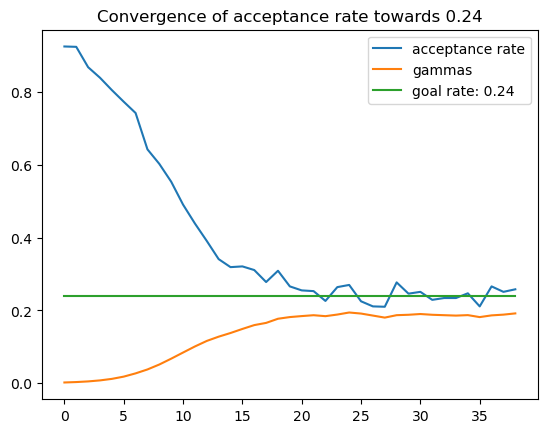

In [17]:
plt.plot(sim_accepts2[:int(end_image/1000)],label="acceptance rate")
plt.plot(sim_gammas2[:int(end_image/1000)],label="gammas")
plt.plot(np.ones(len(sim_accepts2[:int(end_image/1000)]))*0.24,label="goal rate: 0.24")
plt.title("Convergence of acceptance rate towards 0.24")
plt.legend()
plt.show()

Pour lambda > 10, le calcul de la moyenne théorique ne fonctionne pas (divisions par zéro, on demande un degré de précision dans l'estimation de la loi normale N(0,1) qui est trop important). Il faudrait robustifier le code.

## Comparison of the empirical Log-Pi Distribution to the argmax

End of the burn-in


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


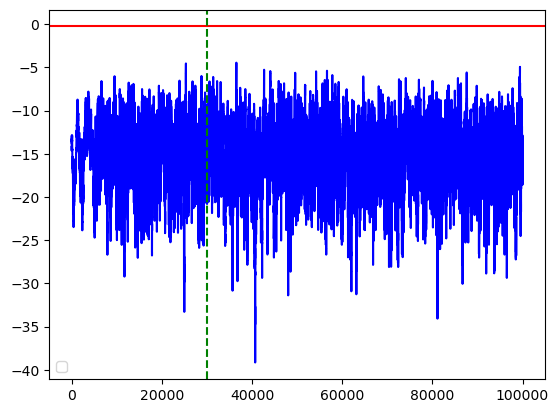

In [21]:
plt.figure()
D = BuildD(T)
U, Delta, Vt = BuildUVDelta(D)
A = BuildA(Delta, Vt)
sh = Buildsh(T, a, b)
theta_tab, theta_tilde_tab, accepts, gammas, theta_mean,end_image = MetropolisHastings(T, Lambda, Y, a,b,method = "image")
plt.plot(LogDistributionPi_Tab(theta_tab, Y, A, D, sh, Lambda), color = "blue")
plt.axhline(LogDistributionPi(ComputeArgmax(T, Lambda, Y,a,b)[0], Y, A, D, sh, Lambda), color = "red")
plt.axvline(end_image,color="green",linestyle="--")
plt.legend()
plt.show()

The LogPi Distibution of the chain is always lower than the LogPi of the Argmax (as it is the maximum value). When T gets higher, the LogPi distribution gets lower compared to the argmax, it is understandable if we visualize the distribution as a product (even though it is not an independence case here).

Studying Pi Distribution of our chain and comparing to argmax (the chain should oscillate around the argmax when enough iterations are done).

C:\Users\sliss\AppData\Local\Temp\ipykernel_14564\2292648833.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


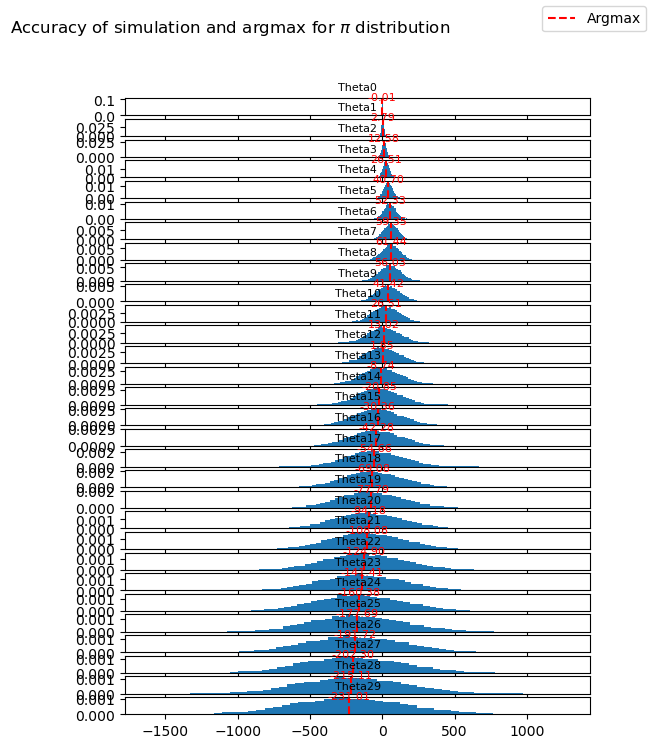

In [22]:
fig, axes = plt.subplots(nrows=T, ncols=1, figsize=(6, 8), sharex=True)
nb_save=theta_tab.shape[0]
argmax=ComputeArgmax(T, Lambda, Y, a, b)[0]
for i in range(T):
    ax = axes[i]
    ax.hist(theta_tab[:,i],bins=50,density=True)
    ax.plot(argmax[i],0,color='red')
    ax.axvline(argmax[i], color='red', linestyle='dashed', label="Argmax" if i==0 else "")
    ax.text(argmax[i], ax.get_ylim()[1] * 0.9, f"{argmax[i]:.2f}", 
            color='red', fontsize=8, ha='center')
    ax.set_title(f"Theta{i}",fontsize=8)


fig.suptitle("Accuracy of simulation and argmax for $\pi$ distribution", x=0.3)
fig.tight_layout()
fig.legend()
plt.show()

We can see that for the first components, the distibution of the simulation is quite well gaussian and we find quite well the argmax but as we increase the dimensions, this becomes less and less accurate, the distribution variance increases very fast and the distribution of the simulation seems to diverge to the real one as the argmax is not anymore equal to the graphic one.

We see that for further dimensions, the argmax takes lower values so if we take a uniform (0, ..., 0) starting point, it takes more time for the chain to reach its argmax, as the distribution function is really flat. (Arman's hypothesis)

C:\Users\sliss\AppData\Local\Temp\ipykernel_14564\220238300.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


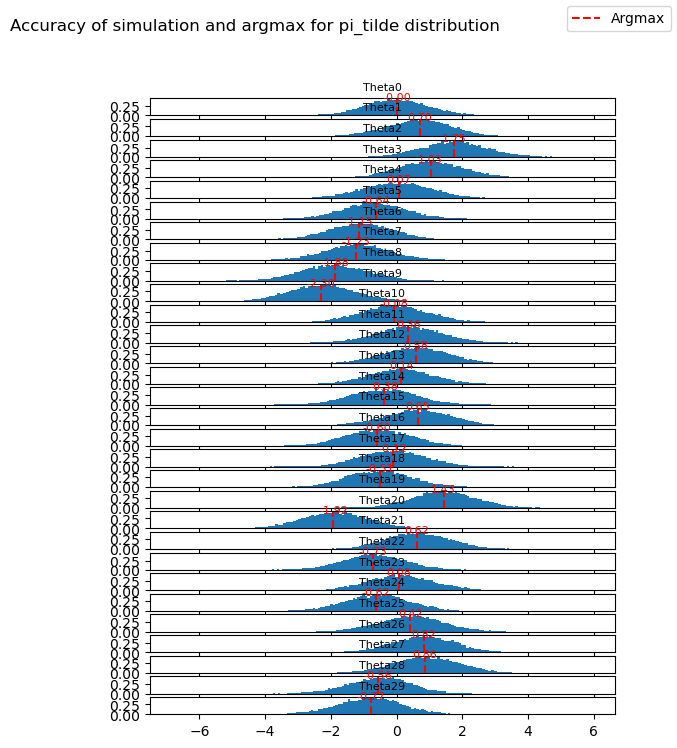

In [23]:
fig, axes = plt.subplots(nrows=T, ncols=1, figsize=(6, 8), sharex=True)
nb_save=theta_tab.shape[0]
argmax=ComputeArgmax(T, Lambda, Y, a, b)[1]
for i in range(T):
    ax = axes[i]
    ax.hist(theta_tilde_tab[:,i],bins=100,density=True)
    ax.plot(argmax[i],0,color='red')
    ax.axvline(argmax[i], color='red', linestyle='dashed', label="Argmax" if i==0 else "")
    ax.text(argmax[i], ax.get_ylim()[1] * 0.9, f"{argmax[i]:.2f}", 
            color='red', fontsize=8, ha='center')
    ax.set_title(f"Theta{i}",fontsize=8)


fig.suptitle("Accuracy of simulation and argmax for pi_tilde distribution", x=0.3)
fig.tight_layout()
fig.legend()
plt.show()

The result is better for the $\tilde\pi$ distribution, the symmetry and variance stay quite the same for every component and the graphic argmax is in accordance with the theoretical one.

## Methods Comparison

Comparaison pour plusieurs valeurs de Lambda, erreur en norme 1 entre les moyennes empiriques et les moyennes théoriques pour différentes méthodes. Les moyennes empiriques sont obtenues après 10^5 itérations, une fois burn-in fini. 

### Différence entre les valeurs simulés et l'argmax en norme 2 (Comparaison à lambda fixé)

In [24]:
D = BuildD(T)
U, Delta, Vt = BuildUVDelta(D)
A = BuildA(Delta, Vt)
sh = Buildsh(T,a,b)
theta_tab_source,_,_,_,_,end_source = MetropolisHastings(T, Lambda, Y,a,b, 1e5, "source")
theta_tab_image,_,_,_,_,end_image = MetropolisHastings(T, Lambda, Y, a,b, 1e5,"image")
theta_tab_subdiff_source,_,_,_,_,end_subdiff_source = MetropolisHastings(T, Lambda, Y, a, b, 1e5, "subdiff_source")
theta_tab_subdiff_image,_,_,_,_,end_subdiff_image = MetropolisHastings(T, Lambda, Y, a,b, 1e5,"subdiff_image")
theta_tab_prox_image,_,_,_,_,end_prox_image = MH_Prox_Image(T, Lambda, Y, a, b)

End of the burn-in
End of the burn-in
End of the burn-in
End of the burn-in
taux d'accept 0.933
gamma 0.001
taux d'accept 0.894
gamma 0.001693
taux d'accept 0.889
gamma 0.002800222
taux d'accept 0.839
gamma 0.004617566078000001
taux d'accept 0.805
gamma 0.007383488158722001
taux d'accept 0.746
gamma 0.011555158968399933
taux d'accept 0.736
gamma 0.0174020694064103
taux d'accept 0.655
gamma 0.026033495831989807
taux d'accept 0.629
gamma 0.03683739660226558
taux d'accept 0.554
gamma 0.05116714388054689
taux d'accept 0.496
gamma 0.06723362705903863
taux d'accept 0.423
gamma 0.08444543558615251
taux d'accept 0.42
gamma 0.09989895029841843
taux d'accept 0.372
gamma 0.11788076135213374
taux d'accept 0.301
gamma 0.1334410218506154
taux d'accept 0.327
gamma 0.14158092418350293
taux d'accept 0.291
gamma 0.1538984645874677
taux d'accept 0.307
gamma 0.16174728628142854
taux d'accept 0.253
gamma 0.17258435446228426
taux d'accept 0.233
gamma 0.17482795107029395
taux d'accept 0.266
gamma 0.173604155

In [25]:
#print(Lambda)
argmax=ComputeArgmax(T, Lambda, Y,a,b)[0]

#dist_tab_source=np.sum(abs(theta_tab_source-argmax),axis=1)/sum(abs(argmax))
#dist_tab_image=np.sum(abs(theta_tab_image-argmax),axis=1)/sum(abs(argmax))
#dist_tab_subdiff_source=np.sum(abs(theta_tab_subdiff_source-argmax),axis=1)/sum(abs(argmax))
#dist_tab_subdiff_image=np.sum(abs(theta_tab_subdiff_image-argmax),axis=1)/sum(abs(argmax))

dist_tab_source=np.linalg.norm(theta_tab_source-argmax,axis=1)/np.linalg.norm(argmax)
dist_tab_image=np.linalg.norm(theta_tab_image-argmax,axis=1)/np.linalg.norm(argmax)
dist_tab_subdiff_source=np.linalg.norm(theta_tab_subdiff_source-argmax,axis=1)/np.linalg.norm(argmax)
dist_tab_subdiff_image=np.linalg.norm(theta_tab_subdiff_image-argmax,axis=1)/np.linalg.norm(argmax)
dist_tab_prox_image=np.linalg.norm(theta_tab_prox_image-argmax,axis=1)/np.linalg.norm(argmax)

[-1.22614994e-02  2.78952489e+00  1.25795062e+01  2.65084472e+01
  4.06978866e+01  5.23298051e+01  5.93486499e+01  6.14430116e+01
  5.60255841e+01  4.14185218e+01  2.65052893e+01  1.30158639e+01
  1.85265796e+00 -8.73698168e+00 -2.08538747e+01 -3.03636789e+01
 -4.22775688e+01 -5.46593860e+01 -6.90835328e+01 -7.77860028e+01
 -9.41754563e+01 -1.08084808e+02 -1.24900092e+02 -1.41407724e+02
 -1.60381271e+02 -1.77687997e+02 -1.91719652e+02 -2.02297268e+02
 -2.15106030e+02 -2.31005269e+02]


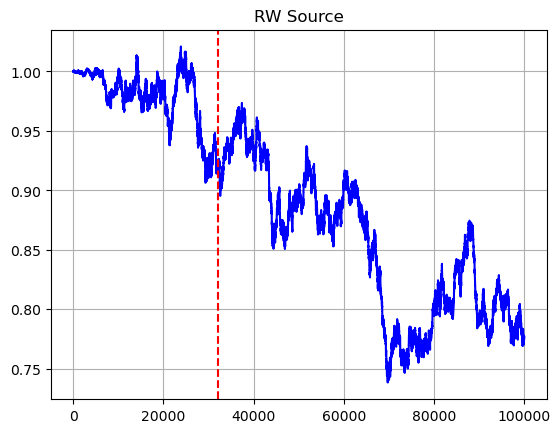

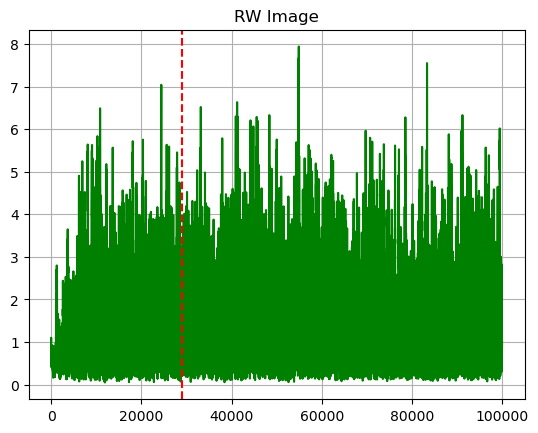

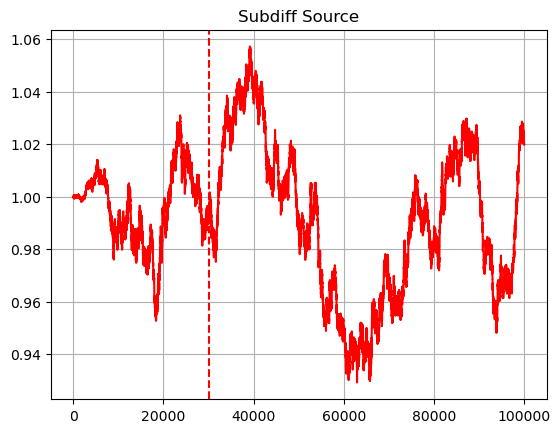

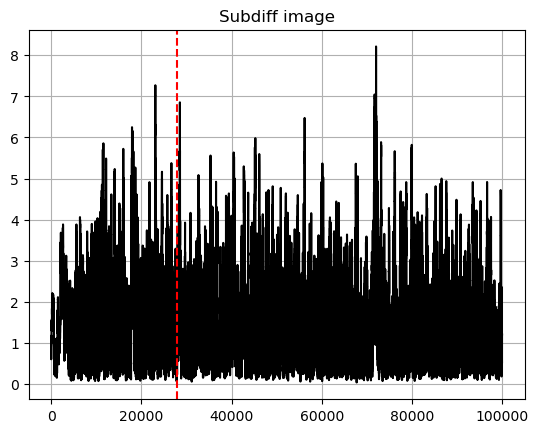

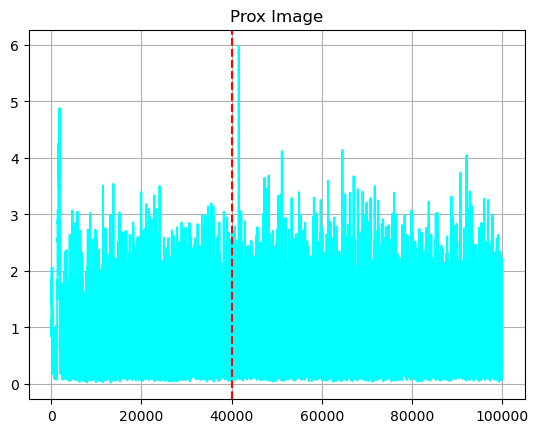

In [26]:
plt.figure()
plt.plot(dist_tab_source, color = "blue")
plt.axvline(end_source,color="red",linestyle="--")
plt.title("RW Source")
plt.grid()
plt.figure()
plt.title("RW Image")
plt.plot(dist_tab_image, color = "green")
plt.axvline(end_image,color="red",linestyle="--")
plt.grid()
plt.figure()
plt.title("Subdiff Source")
plt.plot(dist_tab_subdiff_source, color = "red")
plt.axvline(end_subdiff_source,color="red",linestyle="--")
plt.grid()
plt.figure()
plt.title("Subdiff image")
plt.plot(dist_tab_subdiff_image, color = "black")
plt.axvline(end_subdiff_image,color="red",linestyle="--")
plt.grid()
plt.figure()
plt.title("Prox Image")
plt.plot(dist_tab_prox_image, color = "cyan")
plt.axvline(end_prox_image,color="red",linestyle="--")
plt.grid()
print(argmax)


> On voit que les méthodes sources ont vraiment du mal à converger vers l'argmax alors que les méthodes images convergent très rapidement pour ensuite osciller autour.

### Différence entre les valeurs simulés et l'argmax évaluées en `LogDistributionPi` en erreur relative (Comparaison à lambda fixé)

In [28]:
logpi_argmax=LogDistributionPi(argmax, Y, A, D, sh, Lambda)

dist_source = abs(LogDistributionPi_Tab(theta_tab_source, Y, A, D, sh, Lambda)-logpi_argmax)/abs(logpi_argmax)
dist_image = abs(LogDistributionPi_Tab(theta_tab_image, Y, A, D, sh, Lambda)-logpi_argmax)/abs(logpi_argmax)
dist_subdiff_source = abs(LogDistributionPi_Tab(theta_tab_subdiff_source, Y, A, D, sh, Lambda)-logpi_argmax)/abs(logpi_argmax)
dist_subdiff_image = abs(LogDistributionPi_Tab(theta_tab_subdiff_image, Y, A, D, sh, Lambda)-logpi_argmax)/abs(logpi_argmax)
dist_prox_image = abs(LogDistributionPi_Tab(theta_tab_prox_image, Y, A, D, sh, Lambda)-logpi_argmax)/abs(logpi_argmax)

-0.2552352636257792


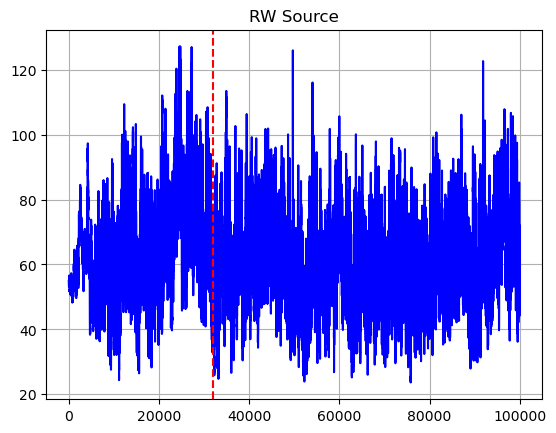

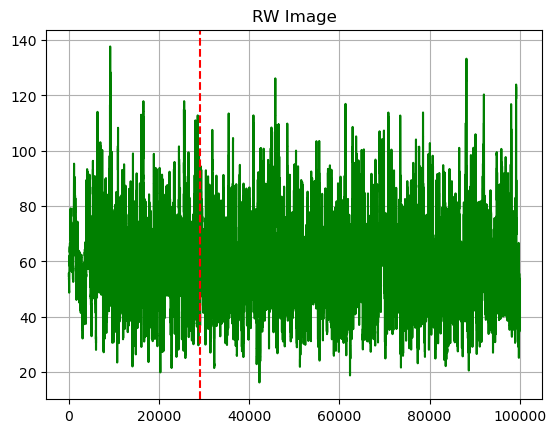

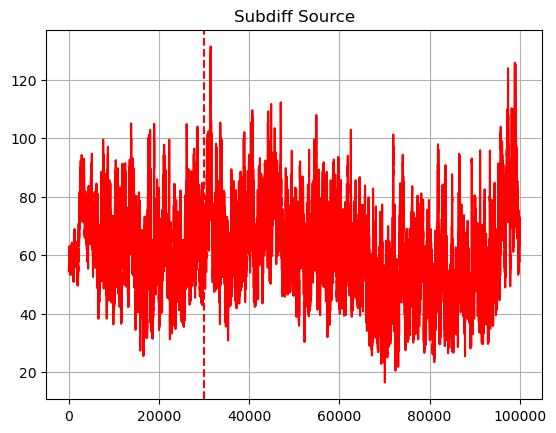

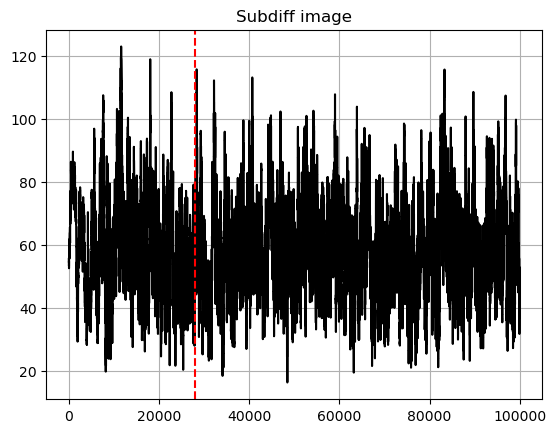

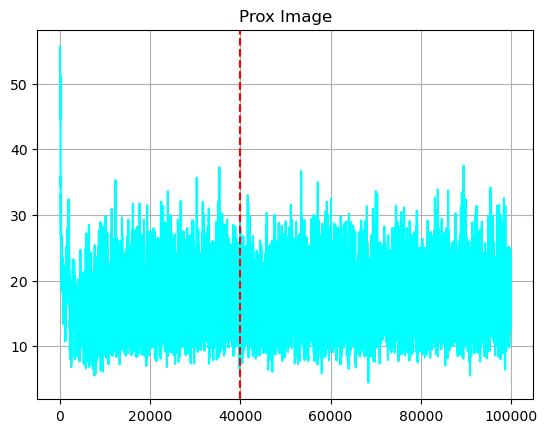

In [30]:
plt.figure()
plt.title("RW Source")
plt.plot(dist_source, color = "blue")
plt.axvline(end_source,color="red",linestyle="--")
plt.grid()
plt.figure()
plt.title("RW Image")
plt.plot(dist_image, color = "green")
plt.axvline(end_image,color="red",linestyle="--")
plt.grid()
plt.figure()
plt.title("Subdiff Source")
plt.plot(dist_subdiff_source, color = "red")
plt.axvline(end_subdiff_source,color="red",linestyle="--")
plt.grid()
plt.figure()
plt.title("Subdiff image")
plt.plot(dist_subdiff_image, color = "black")
plt.axvline(end_subdiff_image,color="red",linestyle="--")
plt.grid()
plt.figure()
plt.title("Prox Image")
plt.plot(dist_prox_image, color = "cyan")
plt.axvline(end_prox_image,color="red",linestyle="--")
plt.grid()
print(logpi_argmax)

>We can see that the method in the image space converge much faster than the source method. Nevertheless, we don't see a significant improvement using the sub differential in the image space compare to the identity.

End of the burn-in


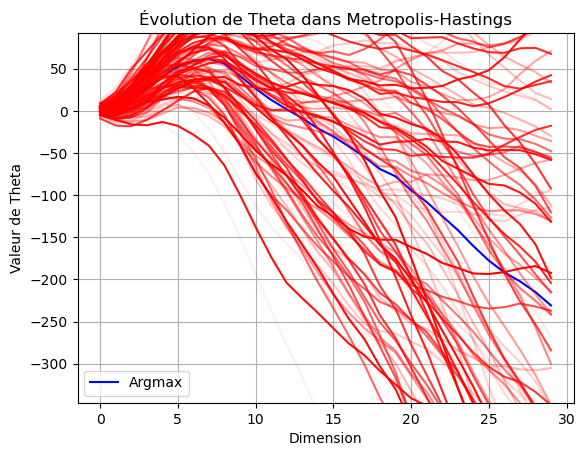

In [50]:
_,_,_,_,_,_ = MetropolisHastingsVisu(T, 0.01, Y, a, b, 1e5,method="image")

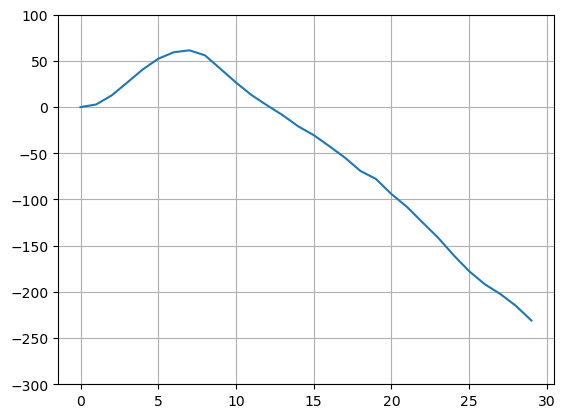

In [39]:
plt.figure()
x,x_tilde = ComputeArgmax(T,Lambda, Y,a,b)
plt.plot(x)
plt.ylim(-300, 100)
plt.grid()